In [2]:
#@title
# https://way2tutorial.com/html/html_marquee_tag.php
%%html
<marquee behavior="alternate" direction="left" style='font-size:18pt; width: 100%; color: #FFB800;'><b>What a blast! Geospatial Analysis using a Virtual Machine</b></marquee>

In [10]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 14.8MB 321kB/s 
     |████████████████████████████████| 6.5MB 47.8MB/s 


# Working with Census data in a geospatial way

## with Python,  Geopandas and Folium using a Jupyter Notebook

This exercise introduces the Geopandas and Folium modules for working with geospatial data, and the "Jupyter Notebook" environment as hosted on Google Colaboratory. You can read about the modules below:

- Geopandas: http://geopandas.org/
- Folium: https://python-visualization.github.io/folium/
- Google Colaboratory - Introduction: https://colab.research.google.com/notebooks/welcome.ipynb
 - Overview of Features - https://colab.research.google.com/notebooks/basic_features_overview.ipynb
 - Installing libraries into the virtual machine - https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb
 - Google Earth Engine with Python - https://colab.research.google.com/github/csaybar/EEwPython/blob/dev/1_Introduction.ipynb

### notes

- *follow along using Google Colaboratory, and feel free to add your own comments or questions to the text or code.*

- *At the end of the exercise, there is an assignment to create your own figures from data you locate yourself.* 

  

In [11]:
# bring in the modules
import os # operating system functions
import glob # find pathnames quickly
import geopandas as gpd # geospatial vector analysis
import pandas as pd # data table analysis
import zipfile # To work with .zip files

In [18]:
# find out working directory
os.getcwd()

'/content'

### Download data from Deschutes County

We can download data directly from Deschutes County, if we know the URL of the dataset. 

https://www.deschutes.org/it/page/developer-resources

They provide the following Python 3 code to download a file, which sets a couple of parameters and then creates a function to download files.

In [19]:
import urllib.request, zipfile, os, cgi, time

#-- Parameters
dataFolder = "C:\\temp\\" 

url = "FULL URL OF DATA SOURCE ZIP LOCATION"

#-- Code
def downloadFile(data):
    response = urllib.request.urlopen(data)
    if "application/json" in response.headers.get('Content-Type', ''):
        print(url + " is being cached on the server.  Script will try again in 3 seconds.")
        time.sleep(3)
        downloadFile(data)
    else:
        headerFileName = cgi.parse_header(response.headers.get('Content-Disposition', ''))[1]['filename']
        localFile = dataFolder + headerFileName
        print("Downloading file " + url +" to " + localFile)

        connection = open(localFile,'wb')
        connection.write(response.read())
        connection.close()

        if localFile.lower().endswith(('.zip')):
            print("Unzipping file " + localFile)
            unZipper = open(localFile, 'rb')
            zippedFiles = zipfile.ZipFile(unZipper)
            for name in zippedFiles.namelist():
                print("Extracting " + name)
                zippedFiles.extract(name, dataFolder)
            unZipper.close()
            os.remove(localFile)



This exercise will use census data from 2010 (block, block group, and tract level) , as well as points of interest in Deschutes County for the exercise.


After some poking around on the website:

https://data.deschutes.org/

the urls to download these files are:


Places of Interest - https://opendata.arcgis.com/datasets/a6cb695c628a4951a374640e183d0b60_2.zip

Census 2010 Data:
- Tracts - https://opendata.arcgis.com/datasets/8f25e9574ec943d1b00fdc7f6ffb88df_0.zip
- Block Groups - https://opendata.arcgis.com/datasets/28666821b61c4f359b88943fba5f25eb_1.zip
- Blocks - https://opendata.arcgis.com/datasets/781a99c267224135b0673fcdadc892d5_2.zip

The urls can be put into a list and downloaded with a loop - but the parameters of the 'datafolder' and 'url' need to be customized for the Colaboratory virtual environment.  

We will use the default workspace in the user environment, and thus set the 'dataFolder' to a blank string.

In [20]:
dataFolder = ''

Create a list of the urls to process

In [21]:
# list of urls to process
dl_files = ['https://opendata.arcgis.com/datasets/a6cb695c628a4951a374640e183d0b60_2.zip',
            'https://opendata.arcgis.com/datasets/8f25e9574ec943d1b00fdc7f6ffb88df_0.zip',
            'https://opendata.arcgis.com/datasets/28666821b61c4f359b88943fba5f25eb_1.zip',
            'https://opendata.arcgis.com/datasets/781a99c267224135b0673fcdadc892d5_2.zip']

Now loop through the list, using the function to download and unzip each file.

In [22]:
for url in dl_files:
  #-- Start the download
  downloadFile(url)
  print(f'Processed {url}')

Unzipping file Places_of_Interest-shp.zip
Extracting Places_of_Interest.shp
Extracting Places_of_Interest.xml
Extracting Places_of_Interest.cpg
Extracting Places_of_Interest.prj
Extracting Places_of_Interest.dbf
Extracting Places_of_Interest.shx
Processed https://opendata.arcgis.com/datasets/a6cb695c628a4951a374640e183d0b60_2.zip
Unzipping file 2010_Census_Tracts-shp.zip
Extracting 2010_Census_Tracts.cpg
Extracting 2010_Census_Tracts.shx
Extracting 2010_Census_Tracts.xml
Extracting 2010_Census_Tracts.shp
Extracting 2010_Census_Tracts.prj
Extracting 2010_Census_Tracts.dbf
Processed https://opendata.arcgis.com/datasets/8f25e9574ec943d1b00fdc7f6ffb88df_0.zip
Unzipping file 2010_Census_Block_Groups-shp.zip
Extracting 2010_Census_Block_Groups.cpg
Extracting 2010_Census_Block_Groups.dbf
Extracting 2010_Census_Block_Groups.shp
Extracting 2010_Census_Block_Groups.prj
Extracting 2010_Census_Block_Groups.shx
Extracting 2010_Census_Block_Groups.xml
Processed https://opendata.arcgis.com/datasets/2

#### Have a look into the files saved in the virtual drivespace

In [23]:
#check to see the shapefiles in the working directory
glob.glob('*.shp')

['2010_Census_Block_Groups.shp',
 'tl_2010_41_county10.shp',
 '2010_Census_Blocks.shp',
 'Places_of_Interest.shp',
 '2010_Census_Tracts.shp',
 'tl_2010_41_uga10.shp']

## State Level Data

Another easy to get data into the virtual machine takes some clicking on our part.

It would be nice to get the Oregon County Boundaries and the Urban Growth Areas for all of Oregon.

We can get state level geospatial data just by clicking a link to the census ftp site:

County Boundaries 2010
ftp://ftp2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_41_county10.zip

UGBs 
ftp://ftp2.census.gov/geo/tiger/TIGER2010/UGA/2010/tl_2010_41_uga10.zip

Census Data on housing units was downloaded using this link:

https://data.census.gov/cedsci/table?t=Housing&g=0500000US41017.100000&tid=DECENNIALSF12010.H1&hidePreview=false

### Hit the 'download table' button to download the .csv format data files packaged into a .zip file. 

## Uploading data to the virtual drive

Put the three zip files you downloaded in the virtual workspace.

You can bring data onto the virtual drive space the colab notebook is running on with the following command, which starts a download dialogue (although in Colaboratory you can also open the file menu on the left and use that to upload data).

When you close the select files dialogue box, the files will start uploading to the virtual drivespace. 
- *You may have to try running this cell twice to get it to work.*

In [3]:
from google.colab import files

uploaded = files.upload()

Saving DECENNIALSF12010.H1_2020-11-04T182040.zip to DECENNIALSF12010.H1_2020-11-04T182040.zip
Saving tl_2010_41_county10.zip to tl_2010_41_county10.zip
Saving tl_2010_41_uga10.zip to tl_2010_41_uga10.zip


see if the zip files are there using the glob module

https://docs.python.org/2/library/glob.html


In [24]:
glob.glob('*.zip')

['tl_2010_41_uga10.zip',
 'tl_2010_41_county10.zip',
 'DECENNIALSF12010.H1_2020-11-04T182040.zip']

### Extract the data

The data comes as a compressed '.zip' file, which needs to be unpacked to read easily. This can be done using the 'zipfile' module: 
https://docs.python.org/2/library/zipfile.html?highlight=zipfiles

We can use the 'glob' module to get their names as a list, and then unzip the files in the list.

In [25]:
# find the .zip files downloaded
zips = glob.glob('*.zip')

# look at the list
zips

['tl_2010_41_uga10.zip',
 'tl_2010_41_county10.zip',
 'DECENNIALSF12010.H1_2020-11-04T182040.zip']

That looks good, now run the loop and unzip.

In [26]:
# extract the geospatial files in the list
for zfile in zips:
    zip_ref = zipfile.ZipFile(zfile, 'r')
    zip_ref.extractall()
    zip_ref.close()

###  *take a look again at what the above code is doing - do you think you could add more comments?*

Now we have a lot of data files - those with the same name before the file extension are shapefiles, which are actually a little bundle of different files.



In [27]:
#list all the files in the working directory 
glob.glob('*')

['tl_2010_41_uga10.zip',
 '2010_Census_Block_Groups.shp',
 'DECENNIALSF12010.H1_data_with_overlays_2020-11-03T190630.csv',
 '2010_Census_Block_Groups.cpg',
 'tl_2010_41_county10.prj',
 'tl_2010_41_county10.shp',
 'tl_2010_41_uga10.prj',
 'Places_of_Interest.xml',
 'DECENNIALSF12010.H1_metadata_2020-11-03T190630.csv',
 '2010_Census_Blocks.xml',
 '2010_Census_Blocks.shp',
 '2010_Census_Block_Groups.xml',
 '2010_Census_Tracts.dbf',
 'Places_of_Interest.shp',
 'DECENNIALSF12010.H1_table_title_2020-11-03T190630.txt',
 'tl_2010_41_county10.dbf',
 '2010_Census_Tracts.xml',
 'Places_of_Interest.cpg',
 '2010_Census_Tracts.shx',
 '2010_Census_Blocks.dbf',
 '2010_Census_Tracts.shp',
 'Places_of_Interest.dbf',
 'tl_2010_41_uga10.dbf',
 'tl_2010_41_county10.shx',
 '2010_Census_Block_Groups.shx',
 '2010_Census_Block_Groups.prj',
 '2010_Census_Blocks.prj',
 '2010_Census_Blocks.cpg',
 'tl_2010_41_uga10.shp',
 'tl_2010_41_county10.shp.xml',
 '2010_Census_Tracts.prj',
 'tl_2010_41_county10.zip',
 'DECEN

## The actual data

Data used for this lab was downloaded from the US census, or from Deschutes County. These are two kinds:

1. Spatial Data - the census boundaries for blocks, counties, etc.
2. Attribute Data - the thematic information (housing units) to join to the spatial data

#### The Spatial Data

Taken directly from Deschuted County or the Census TIGER File Website, the polygons showing census reporting polygons.

These are available from: http://www.census.gov/cgi-bin/geo/shapefiles2010/main 

#### The Attribute Data

Housing by block data was downloaded from the Census website at:

https://data.census.gov/cedsci/

All of this data has also been placed into the R: drive folder for this lab in case of emergency, but you should have already downloaded it yourself.

## Now that the data is extracted, the 'geopandas' library (package) allows us to explore it.
http://geopandas.org/




## Open the Data

In [16]:
# put this in for display inside of jupyter notebook
%matplotlib inline  

In [15]:
# list the names of the shapefiles in the directory
shapes = glob.glob("*.shp")
shapes

['tl_2010_41_county10.shp', 'tl_2010_41_uga10.shp']

In [28]:
# read the shapefiles into geopandas dataframes
OrUGBs = gpd.read_file('tl_2010_41_uga10.shp')
OrCounty = gpd.read_file('tl_2010_41_county10.shp')
DesTract = gpd.read_file('2010_Census_Tracts.shp')
DesBlocks = gpd.read_file('2010_Census_Blocks.shp')
DesBG = gpd.read_file('2010_Census_Block_Groups.shp')

## Briefly examine an attribute table

Check out the column names, and the last column, which contains the vertice location information for the polygons. Notice also the 'GEOID10' field, which we will see in several different datasets in this exercise.

Using a method for the geopandas dataframe, we can examine the start of the data file.

In [19]:
# look at first two records in Counties polygon data
OrCounty.head(2)

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,41,049,01135860,41049,Morrow,Morrow County,06,H1,G4020,None,37820,None,A,5261843781,43778396,+45.4254956,-119.6023111,"POLYGON ((-119.89847 45.25615, -119.90013 45.2..."
1,41,007,01135846,41007,Clatsop,Clatsop County,06,H1,G4020,None,11820,None,A,2147227903,661312521,+46.0245092,-123.7050140,"POLYGON ((-124.00807 46.01053, -124.00791 46.0..."


A different method - `plot()` - allows the display of the data spatially

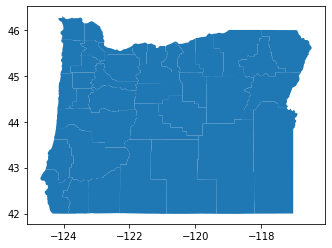

In [34]:
# simple plot of the counties to check the data
OrCounty.plot()

## Reproject the data

Note the coordinates shown on the axis - these are in decimal degrees and the map is unprojected. For mapping at the scale of Oregon, a different projection/coordinate system would be better.

This can be changed in the data with another method - `crs()1`

In [35]:
# change the coordinate system to something more pleasing than WGS84
OrCounty = OrCounty.to_crs(epsg='2994')
OrUGBs = OrUGBs.to_crs(epsg='2994')

## *What does 'epsg' stand for?*

Look this up with an online search and check out epsg 2994. 

## Plot the data with two layers

which requires some additional coding

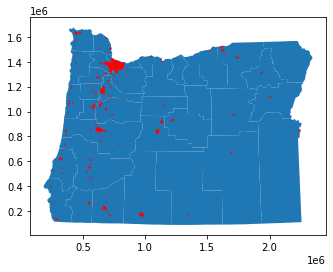

In [36]:
# simple plot of the data for oregon
base = OrCounty.plot()
OrUGBs.plot(ax=base, color="Red")

## Plot the county level data

First look at the Tract level polygons


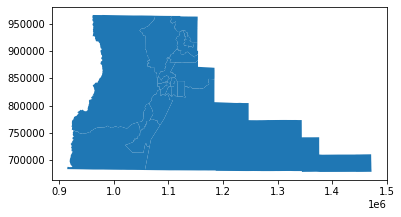

In [37]:
DesTract = DesTract.to_crs(epsg='2994')
DesTract.plot()

### The Block Groups

In [38]:
# convert the coordinate system
DesBG = DesBG.to_crs(epsg='2994')

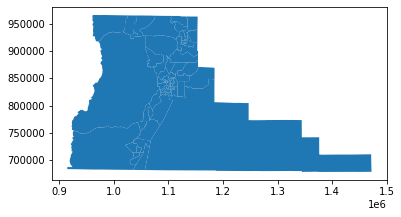

In [39]:
DesBG.plot()

### Plot the blocks

Note that this takes longer to process.

In [40]:
DesBlocks = DesBlocks.to_crs(epsg='2994')

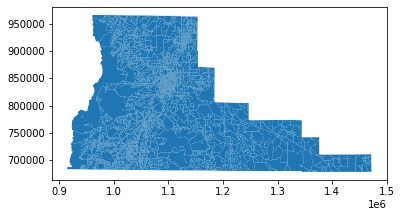

In [41]:
DesBlocks.plot()

## Examine the attribute data

Note that there is not a lot of information, apart from ID numbers. Those can be used to join other data to the table.

In [28]:
# examine the beginning of the blocks attribute table
DesBlocks.head()

,OBJECTID,GEOID10,STATEFP10,COUNTY,CNTY_NAME,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,TRACT,BLOCK,HU,HU_OCC,POP,POP_017,POP_18PLUS,HISP,NH_WHITE_O,NH_BLACK_O,NH_AIAN_ON,NH_ASIAN_O,NH_NHOPI_O,NH_OTHER,NH_TWO_OR,WH_AOIC,BL_AOIC,AIAN_AOIC,ASN_AOIC,NHOPI_AOIC,OTH_AOIC,SHAPE_Leng,SHAPE_Area,geometry
0,1,410170004011099,41,017,Deschutes,375094,0,+43.8852339,-121.3945597,52564,000401,1099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4585.126930,7.222927e+05,"POLYGON ((1076098.500 777478.989, 1075903.804 ..."
1,2,410170004022011,41,017,Deschutes,445,0,+43.9132029,-121.4269389,50032,000402,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111.792659,8.570568e+02,"POLYGON ((1068119.001 789852.313, 1068101.288 ..."
2,3,410170005002081,41,017,Deschutes,763226,0,+44.3384141,-121.6230241,53593,000500,2081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6798.614258,1.492248e+06,"POLYGON ((1016873.868 948311.052, 1016945.670 ..."
3,4,410170005003039,41,017,Deschutes,5413,0,+44.2955671,-121.5698353,49852,000500,3039,6,4,17,9,8,0,17,0,0,0,0,0,0,17,0,0,0,0,0,463.974724,1.056865e+04,"POLYGON ((1032219.480 929896.436, 1032360.391 ..."
4,5,410170002003027,41,017,Deschutes,1412179,0,+43.6921360,-121.4751741,49732,000200,3027,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12388.521663,2.701937e+06,"POLYGON ((1056168.969 709162.870, 1055918.142 ..."


# Deschutes County Census Data

Census information on housing has been downloaded previously. This information can be joined to the spatial datasets for some thematic mapping. 

http://geopandas.org/mergingdata.html#attribute-joins

* Note that the 2020 US Census just finished and data will hopefully be available soon, so not a bad idea to get familiar with working with the data.



In [58]:
# the data comes as .csv files, which were extracted from a zip file above
csvlist = glob.glob('*.csv')
csvlist

['DECENNIALSF12010.H1_data_with_overlays_2020-11-03T190630.csv',
 'DECENNIALSF12010.H1_metadata_2020-11-03T190630.csv',
 'DECENNIALSF12010.P1_data_with_overlays_2020-11-05T204610.csv',
 'DECENNIALSF12010.P1_metadata_2020-11-05T204610.csv']

### Get housing data for the census blocks

This is the 'DECENNIALSF12010.H10_data_with_overlays_....csv' file.

The name has a timestamp at the end if downloaded the data.census.gov so the file name should differ and the end.

In [59]:
# read in the housing data from the list
# first item in the list is the file..
h1 = pd.read_csv(csvlist[0])

In [31]:
# find the rows and columns number
h1.shape

(2, 2)

That is the number of rows and columns, see if it matches the Block polygons roughly

In [32]:
DesBlocks.shape

(8088, 34)

One off in the number of records, so that looks good. 
Examine the actual data as well.

In [33]:
h1.head(2)

,GEO_ID,id
0,NAME,Geographic Area Name
1,H001001,Total


There are 4 columns (fields) of information.

To make a join, identify a matching field in the polygon data.

In [42]:
# obtain a list of the fields in the Blocks polygon data
geofields = list(DesBlocks)
geofields

['OBJECTID',
 'GEOID10',
 'STATEFP10',
 'COUNTY',
 'CNTY_NAME',
 'ALAND10',
 'AWATER10',
 'INTPTLAT10',
 'INTPTLON10',
 'LOGRECNO',
 'TRACT',
 'BLOCK',
 'HU',
 'HU_OCC',
 'POP',
 'POP_017',
 'POP_18PLUS',
 'HISP',
 'NH_WHITE_O',
 'NH_BLACK_O',
 'NH_AIAN_ON',
 'NH_ASIAN_O',
 'NH_NHOPI_O',
 'NH_OTHER',
 'NH_TWO_OR',
 'WH_AOIC',
 'BL_AOIC',
 'AIAN_AOIC',
 'ASN_AOIC',
 'NHOPI_AOIC',
 'OTH_AOIC',
 'SHAPE_Leng',
 'SHAPE_Area',
 'geometry']

The 'GEOID10' field is the one - take a look at one record.

This takes some fancy indexing with the Geopandas data object.

In [43]:
# examine the data in the second row of the GEOID column
DesBlocks['GEOID10'][1]

'410170004022011'

In [36]:
# check out the census survey data in the second row of the GEO_ID column
h1['GEO_ID'][1]

'H001001'

It looks like there is a match at the end of the data. Let's remove the bit that doesn't match and make a new column

In [60]:
h1['NewID'] = h1['GEO_ID'].str.lstrip('1000000US')
h1.head(3)

,GEO_ID,NAME,H001001,NewID
0,id,Geographic Area Name,Total,id
1,1000000US410170001001483,"Block 1483, Block Group 1, Census Tract 1, Des...",0,410170001001483
2,1000000US410170021003014,"Block 3014, Block Group 3, Census Tract 21, De...",23,410170021003014


In [38]:
DesBlocks.head(1)

,OBJECTID,GEOID10,STATEFP10,COUNTY,CNTY_NAME,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,TRACT,BLOCK,HU,HU_OCC,POP,POP_017,POP_18PLUS,HISP,NH_WHITE_O,NH_BLACK_O,NH_AIAN_ON,NH_ASIAN_O,NH_NHOPI_O,NH_OTHER,NH_TWO_OR,WH_AOIC,BL_AOIC,AIAN_AOIC,ASN_AOIC,NHOPI_AOIC,OTH_AOIC,SHAPE_Leng,SHAPE_Area,geometry
0,1,410170004011099,41,017,Deschutes,375094,0,+43.8852339,-121.3945597,52564,000401,1099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4585.12693,722292.671738,"POLYGON ((1076098.500 777478.989, 1075903.804 ..."


### *You can tell that these id numbers in 'NewID' and "GEOID10" are from the same State and County, how?*

In [39]:
# check the data type of the census block polygon join column
DesBlocks['GEOID10'].dtype

dtype('O')

In [40]:
# check the data type of the housing data join column
h1['NewID'].dtype

dtype('O')

Looks like those will be suitable, now for the join part - called a 'merge' here:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

In [61]:
# join the data (well, merge it) based on the shared field values
DesBlocks = DesBlocks.merge(h1, left_on=['GEOID10'], right_on=['NewID'])

In [42]:
# examine the result
DesBlocks.head(1)

,OBJECTID,GEOID10,STATEFP10,COUNTY,CNTY_NAME,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,TRACT,BLOCK,HU,HU_OCC,POP,POP_017,POP_18PLUS,HISP,NH_WHITE_O,NH_BLACK_O,NH_AIAN_ON,NH_ASIAN_O,NH_NHOPI_O,NH_OTHER,NH_TWO_OR,WH_AOIC,BL_AOIC,AIAN_AOIC,ASN_AOIC,NHOPI_AOIC,OTH_AOIC,SHAPE_Leng,SHAPE_Area,geometry,GEO_ID,id,NewID



Looks like it worked - you might have to scroll to the right in the window above to see the housing units per block! This is in the column called 'H010001'

Thanks to the sites below for information that helped out so far.

 - http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/

 - http://darribas.org/gds15/content/labs/lab_03.html



## Plot the joined data, showing the number of housing units per census block

geopandas has basic plotting as a method... 
with a column named, it will automatically generate a basic thematic map.  This is called `'H001001'`

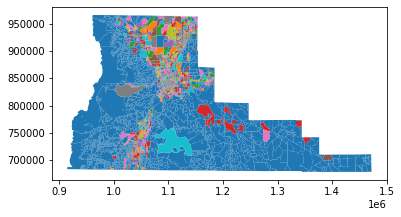

In [62]:
DesBlocks.plot(column='H001001')

Not the best-looking...

#### Adjust the color!

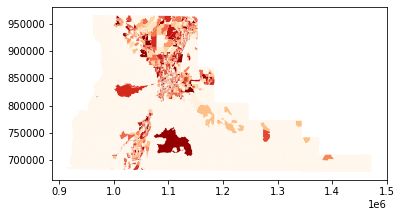

In [63]:
DesBlocks.plot(column='H001001', cmap='OrRd')

## make a fancier plot

For fancier styling, the 'matplotlib' module works with geopandas objects.

https://matplotlib.org/

In [66]:
import matplotlib.pyplot as plt

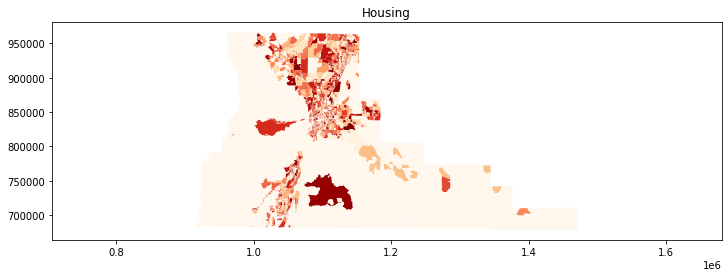

In [67]:
f, ax = plt.subplots(1, figsize=(12, 4))
ax = DesBlocks.plot(column='H001001', cmap='OrRd', ax=ax)
lims = plt.axis('equal')
plt.title('Housing')
plt.show()

## Calculate centroids

Many geospatial operations are also included as *methods* with geopandas. 

In this example, calculate the Census Block centroids as a separate 'geoseries' (this could be done as a column inside the blocks polygons also)

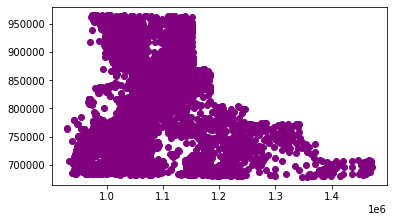

In [72]:
block_centroids = DesBlocks.centroid
block_centroids.plot(color='purple')

In [48]:
block_centroids.head(3)

GeoSeries([], dtype: geometry)

### Now deal with the attributes

The centroids do not have any data attached to them, so now we can copy the housing information from the polygons, and then set the 'geometry' field for the new geodataframe object.

Column names should be cleaned up as well.

In [80]:
# change the geoseries into a geodataframe
d_bs = gpd.GeoDataFrame(block_centroids)

# copy the housing units data onto the centroid points
d_bs['h_units']=DesBlocks['H001001']

In [81]:
# look at the column names
list(d_bs)

[0, 'h_units']

In [82]:
# rename that weird column
d_bs = d_bs.rename(index=str, columns={0: "points"})

In [83]:
# set the geometry
d_bs = d_bs.set_geometry(d_bs['points'])

In [84]:
# copy the spatial reference
d_bs.crs = DesBlocks.crs

In [85]:
# change the data type of the 'h_units' column
d_bs['h_units'] = d_bs['h_units'].astype('float')

## Note some differences with arcpy here...

The geometry is fairly visible, and the coordinate system of the data can be changed without making a new file.

None of the data has been saved in a specific memory location with a specified filename, so it is all 'temporary' at this point.

It would be nice to delete the duplicate 'points' column, but that isn't crucial since this date doesn't need to be saved.

In [ ]:
d_bs.head(3)

In [ ]:
d_bs.plot()

In [86]:
# get the top ten blocks using a sort and the head method
top_housing = d_bs.sort_values(by='h_units',  ascending=False).head(10)
top_housing

,points,h_units,geometry
6800,POINT (1066617.811 783929.977),624.0,POINT (1066617.811 783929.977)
1675,POINT (1106866.139 843437.642),558.0,POINT (1106866.139 843437.642)
5126,POINT (1064022.388 776198.033),506.0,POINT (1064022.388 776198.033)
1346,POINT (1090136.208 830261.204),441.0,POINT (1090136.208 830261.204)
2940,POINT (1112439.038 843566.063),435.0,POINT (1112439.038 843566.063)
6127,POINT (1107718.919 846561.249),393.0,POINT (1107718.919 846561.249)
4860,POINT (1133541.846 924031.839),374.0,POINT (1133541.846 924031.839)
4482,POINT (1132614.430 929721.690),319.0,POINT (1132614.430 929721.690)
1164,POINT (1104457.841 849443.792),306.0,POINT (1104457.841 849443.792)
662,POINT (1109397.225 843798.289),302.0,POINT (1109397.225 843798.289)


## Plot the housing with a background map

Not the greatest figure - transparency, color, size, etc. could be modified.

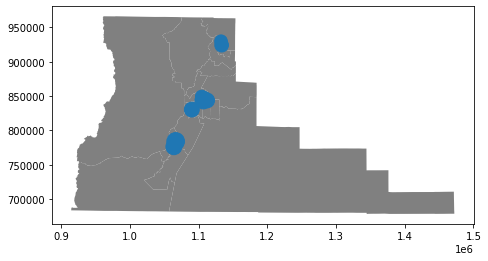

In [87]:
base = DesTract.plot(color="Grey", figsize=(12,4))
top_housing.plot(ax=base, markersize=(top_housing['h_units']/2))

# Look at Places of Interest 

Now, bring in some additional data downloaded from Deschutes County - locations of libraries, schools, etc.

In [88]:
DesPOI = gpd.read_file('Places_of_Interest.shp')

# don't forget to change the crs!
DesPOI = DesPOI.to_crs(epsg='2994')

In [89]:
# examine the beginning of the points of interest attribute table
DesPOI.head(4)

,OBJECTID,PLACE_TYPE,NAME,TAXLOT,ADDRESS,CITY,POINT_X,POINT_Y,MAP_LABEL,geometry
0,1,2,PILOT BUTTE CEMETERY,171233DC00100,1200 NE BEAR CREEK RD,BEND,4.713688e+06,870920.195656,Pilot Butte Cemetery,POINT (1104824.598 840679.190)
1,2,2,DESCHUTES MEMORIAL GARDENS,171209A002401,63875 N HWY 97,BEND,4.713307e+06,894656.960683,Deschutes Memorial Gardens,POINT (1104448.182 864409.999)
2,3,9,BEND FACTORY STORES,181208D000900,61330 S HWY 97,BEND,4.707566e+06,861181.027634,Bend Factory Stores,POINT (1098702.207 830943.518)
3,4,9,BEND RIVER PROMENADE,171221C001601,3188 N HWY 97,BEND,4.710106e+06,881136.612723,Bend River Promenade,POINT (1101244.938 850893.757)


# Select Public Libraries


In [90]:
# select out just the public libraries
pattern = 'PUBLIC LIBRARY'

DesLibs = DesPOI[(DesPOI['NAME'].str.contains(pattern))]

DesLibs

,OBJECTID,PLACE_TYPE,NAME,TAXLOT,ADDRESS,CITY,POINT_X,POINT_Y,MAP_LABEL,geometry
51,52,6,BEND PUBLIC LIBRARY,171232CA05000,601 NW WALL ST,BEND,4.706582e+06,872305.493016,Bend Public Library,POINT (1097720.810 842065.513)
52,53,6,SISTERS PUBLIC LIBRARY,151004CD05300,110 N CEDAR ST,SISTERS,4.647681e+06,958493.805339,Sisters Public Library,POINT (1038855.175 928242.511)
53,54,6,SUNRIVER AREA PUBLIC LIBRARY,201105D001100,56855 VENTURE LN,SUNRIVER,4.674593e+06,802860.495513,Sunriver Area Public Library,POINT (1065723.923 772641.981)
54,55,6,LA PINE PUBLIC LIBRARY,221014BB00200,16425 1ST ST,LA PINE,4.655396e+06,733259.468048,La Pine Public Library,POINT (1046513.492 703055.803)
55,56,6,REDMOND PUBLIC LIBRARY,151316AB12502,827 SW DESCHUTES AVE,REDMOND,4.743916e+06,951039.545183,Redmond Public Library,POINT (1135058.494 920770.830)


# Fancier map styling



In [91]:
# don't forget to change the crs!
DesLibs = DesLibs.to_crs(epsg='2994')

Text(0.5, 1.0, 'Libraries and 10 Largest Housing Areas')

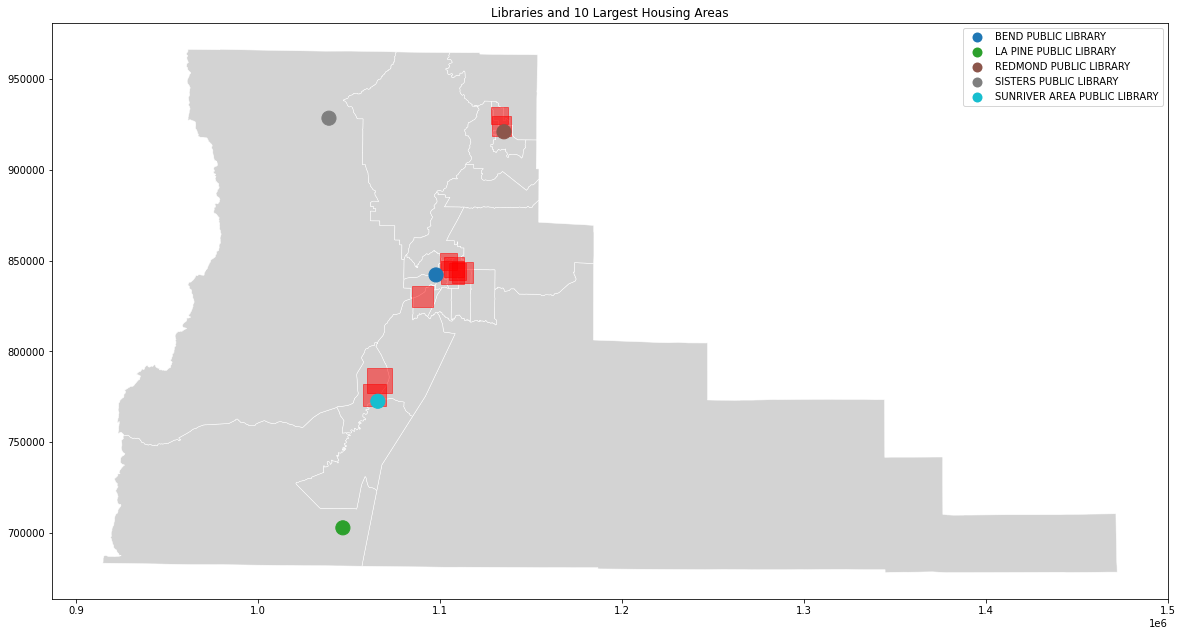

In [92]:
# Save the first layer as ax
ax = DesTract.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,15))
# Pass ax=ax to the second layer
top_housing.plot(marker='s', markersize=(top_housing['h_units']),
                 alpha=0.5, color='red', ax=ax)
DesLibs.plot(markersize=200, column='NAME', categorical=True, legend=True, ax=ax)
ax.set_title('Libraries and 10 Largest Housing Areas')
#plt.xlim([bounds.minx.min()-500, bounds.maxx.max()+500])
#plt.ylim([bounds.miny.min()-500, bounds.maxy.max()+500]);

# Plot the Census Blocks polygons as a Thematic Map

The type of the data in the column needs to be changed. It is a 'string' type, not so good for math. 

In [102]:
DesBlocks.tail(1)

,OBJECTID,GEOID10,STATEFP10,COUNTY,CNTY_NAME,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,TRACT,BLOCK,HU,HU_OCC,POP,POP_017,POP_18PLUS,HISP,NH_WHITE_O,NH_BLACK_O,NH_AIAN_ON,NH_ASIAN_O,NH_NHOPI_O,NH_OTHER,NH_TWO_OR,WH_AOIC,BL_AOIC,AIAN_AOIC,ASN_AOIC,NHOPI_AOIC,OTH_AOIC,SHAPE_Leng,SHAPE_Area,geometry,GEO_ID,NAME,H001001,NewID
8087,8088,410170005001208,41,017,Deschutes,5198944,0,+44.2124534,-121.6134147,52862,000500,1208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24573.816901,1.012171e+07,"POLYGON ((1020164.697 898097.890, 1020039.323 ...",1000000US410170005001208,"Block 1208, Block Group 1, Census Tract 5, Des...",0,410170005001208


In [103]:
type(DesBlocks['H001001'][0])

str

In [104]:
DesBlocks['H001001'] = DesBlocks['H001001'].astype('int')

## Now Plot

(886575.914058366, 1500071.6037513413, 664037.0599716889, 980483.388798927)

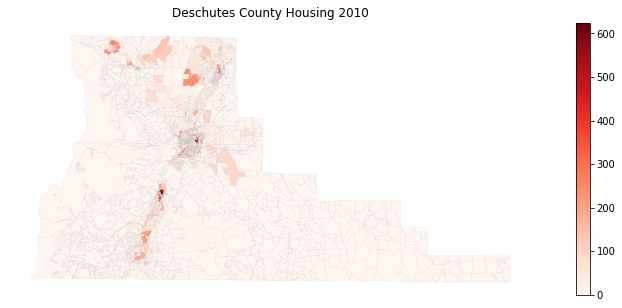

In [105]:
# Save the first layer as ax
ax = DesBlocks.plot(column='H001001', linewidth=0.05, edgecolor='grey',
               k=10, cmap=plt.cm.Reds, alpha=0.9, legend=True, figsize=(15,5))
ax.set_title('Deschutes County Housing 2010')
ax.axis('off')

## Get the county outline polygon from the Oregon Counties

In [113]:
D_cnty = OrCounty[(OrCounty['NAME10'].str.contains('Deschutes'))]

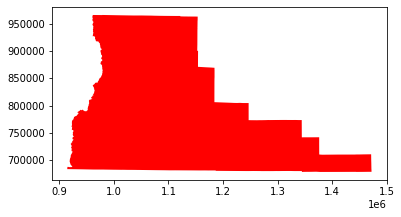

In [114]:
D_cnty.plot(color='red')

In [115]:
# geopandas also comes with some sample data
gpd.datasets.available
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Select out North America and change the crs at the same time

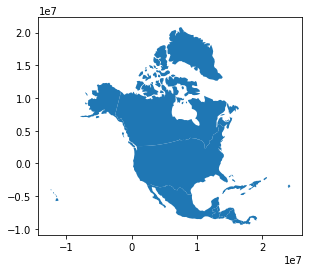

In [116]:
#select NA and change projection
namer = (world.loc[world['continent'] == 'North America']).to_crs(epsg=2994)
namer.plot()

Plot Oregon in a bit larger context

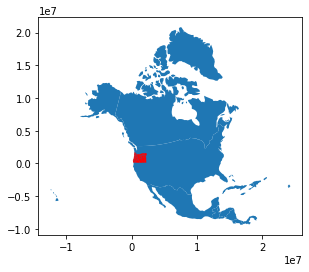

In [117]:
ax = namer.plot()
OrCounty.plot(ax=ax, color='red')

# How about a density surface (Heatmap)

These are pretty fun, but easy to get wrong visually...

In [118]:
import numpy as np
from scipy import ndimage

A totally copied function to make a heatmap and plot, from:
*Making Geopandas Heatmaps* - https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434

In [119]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.title("Housing Density")
    plt.show()


try changing the bins, smoothing, and cmap in the heatmap function to change your output here!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


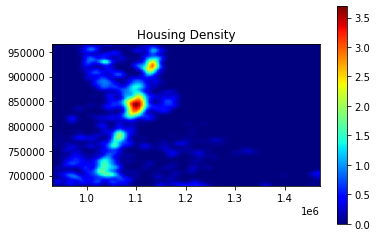

In [120]:
heatmap(d_bs, bins=100, smoothing=1.3)

# Add the attribute data

The heatmap above only plots the centroid density, not the housing density (the number of housing units per centroid). The function can be modified to add the attribute wieght to density calculation.

In [121]:
def heatmapw(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
   
    # makes the weights as list from the Census Block attributes
    weights = pd.to_numeric(d['h_units'], downcast='float')
    # this line has been changed - but the function still needs some mods! and commenting!
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins, weights=weights)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [122]:
# makes the weights as list from the Census Block attributes
weights = pd.to_numeric(d_bs['h_units'], downcast='float')

This should make the towns pop out a bit more

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


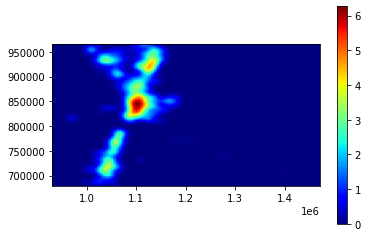

In [123]:
heatmapw(d_bs, bins=100, smoothing=1.5)

# Make a basic interactive online density map
https://python-visualization.github.io/folium/

The 'Folium' python package allows the creation of online maps. The housing data can be plotted directly, or again as a density map.

In [124]:
import folium
from folium.plugins import HeatMap

In [125]:
from folium import plugins

In [126]:
# make sure using the WGS84 crs
heatpoints =  d_bs.to_crs({'init':'epsg:4326'})
# draw the heatmap
hmap = folium.Map(location=[44.0, -121.5], zoom_start=10, tiles = "OpenStreetMap", control_scale='True')
hm_wide = HeatMap(zip(heatpoints.geometry.y, heatpoints.geometry.x, d_bs['h_units']), 
                  min_opacity=0.1,
                  max_val=99,
                  radius=6,
                  blur=15, 
                  max_zoom=1,
                 )
plugins.Terminator().add_to(hmap)
hmap.add_child(hm_wide)
# save to an html file
hmap.save('DeschutesHousing_2010.html')
# show the map in colab
hmap

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [127]:
# look for only .html files in the working folder
glob.glob('*.html') 

['DeschutesHousing_2010.html']

In [128]:
# download the folium map to your local computer
files.download('DeschutesHousing_2010.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# The assignment

### Now, of course, it would be fun to add more data to look at patterns on a broader or more detailed scale... Or look at other things...

# For the lab assignment:

### Find some different block level census thematic data about Deschutes County (or choose another county) and create three map figures. Turn in a notebook document (.ipynb format) showing your code and output and a .pdf print of the notebook. If you make a folium map, include the .html version of the map.

 1. a figure showing the county location in the context of the other Oregon counties.
 2. a figure showing a choropleth thematic map based on census block polygons and additional data from the census
 3. a figure showing a graduated size map based on census block centroids for your chosen county (alternately, create a density surface with the point data)
 
### All of the figure should have titles, be legible, and be shown using the Oregon Lambert Coordinate System

####- unless you use folium, which likes WGS84

If you choose to use folium, upload an .html file of your folium map in addition to the jupyter notebook python code and .pdf export of the notebook code/output you use to generate the code. Use *File-Download .ipynb* to save your notebook .ipynb file and use print to generate a .pdf file of your notebook. If you do note use folium, you can right-click on an image to copy and paste images generated in the notebook into a word document.

### Census data sources

- The Spatial Data - Taken directly from the Census TIGER File Website, the polygons showing census reporting polygons.
 - These are available from: http://www.census.gov/cgi-bin/geo/shapefiles2010/main

- The Attribute Data - Housing by block data was downloaded from the US Census. The 'Advanced Search' is a good way to find other attributes: https://data.census.gov/cedsci/advanced

To filter data to the 'blocks' of Deschutes County:
https://data.census.gov/cedsci/advanced?g=0500000US41017.100000

Block Groups - https://data.census.gov/cedsci/advanced?g=0500000US41017.150000



The Census FTP site - https://www2.census.gov/ - also provides access to survey data, but it is formatted differently.


# Grading
30 points

10 points per figure with commented code and explanations in the notebook. 
Please carefully consider the design of your figures and the supporting text.  

### some more heatmap references

https://alcidanalytics.com/p/geographic-heatmap-in-python

http://blog.danwin.com/census-places-cartodb-geopandas-mapping/

http://qingkaikong.blogspot.com/2016/06/using-folium-3-heatmap.html

http://python-visualization.github.io/folium/docs-v0.5.0/modules.html#id2

https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

### Tips on mapping and fancy styling.

http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

http://geopandas.org/mapping.html#maps-with-layers

Here are a couple of links that nicely explain some of the stuff involved in this notebook.

http://darribas.org/gds15/content/labs/lab_03.html

http://geopandas.org/mapping.html#maps-with-layers

http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/

https://stackoverflow.com/questions/35516318/plot-colored-polygons-with-geodataframe-in-folium


examples for selections:

https://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string

http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

`In [66]: pattern = r'[0-9][a-z]'

In [67]: pd.Series(['1', '2', '3a', '3b', '03c']).str.contains(pattern)`
https://geohackweek.github.io/vector/04-geopandas-intro/

`seas_na_arealt1000 = seas[(seas['oceans'] == 'North Atlantic Ocean') & (seas.geometry.area < 1000)]`

**Figure 1**

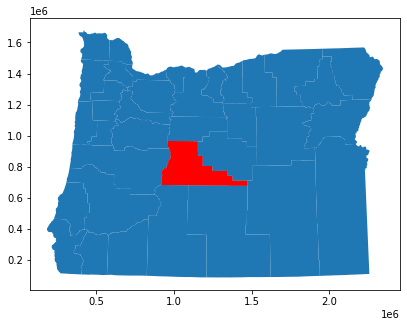

In [111]:
# Pull Deschutes County out of Oregon Counties
deschutes = OrCounty[(OrCounty['NAMELSAD10'] == 'Deschutes County')]

# Plot Oregon Counties as background with Lane County colored red
oregon = OrCounty.plot(figsize=(15,5))
deschutes.plot(ax=oregon, color="Red")

**Figure 2**

In [30]:
uploaded = files.upload()
# DECENNIALSF12010.P1_2020-11-05T204615.zip, tl_2010_41017_tabblock10.zip

Saving DECENNIALSF12010.P1_2020-11-05T204615.zip to DECENNIALSF12010.P1_2020-11-05T204615.zip
Saving tl_2010_41017_tabblock10.zip to tl_2010_41017_tabblock10.zip


In [31]:
# extract the geospatial files in the list
for zfile in ['DECENNIALSF12010.P1_2020-11-05T204615.zip', 'tl_2010_41017_tabblock10.zip']:
    zip_ref = zipfile.ZipFile(zfile, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [106]:
# read the shapefile into geopandas dataframes
deschutes_blocks = gpd.read_file('tl_2010_41017_tabblock10.shp')

# change the coordinate system to something more pleasing than WGS84
deschutes_blocks = deschutes_blocks.to_crs(epsg='2994')

# read in census info
p1 = pd.read_csv('DECENNIALSF12010.P1_data_with_overlays_2020-11-05T204610.csv')

# merge data based on the shared field values
p1['GEO_ID'] = p1['GEO_ID'].str.lstrip('1000000US')
deschutes_blocks = deschutes_blocks.merge(p1, left_on=['GEOID10'], right_on=['GEO_ID'])
deschutes_blocks['P001001'] = deschutes_blocks['P001001'].astype('int')

# deschutes_blocks.plot()

(886579.5885295669, 1500075.235314618, 664035.037907323, 980481.3306057288)

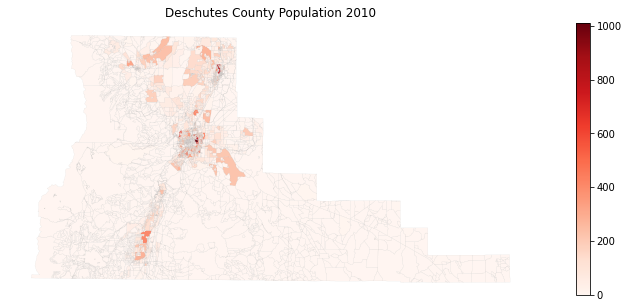

In [109]:
# Plot population per census block in Deschutes County
ax = deschutes_blocks.plot(
    column='P001001', 
    linewidth=0.05, 
    edgecolor='grey',
    k=10, 
    cmap=plt.cm.Reds, 
    alpha=0.9, 
    legend=True, 
    figsize=(15,5)
)
ax.set_title('Deschutes County Population 2010')
ax.axis('off')

**Figure 3**

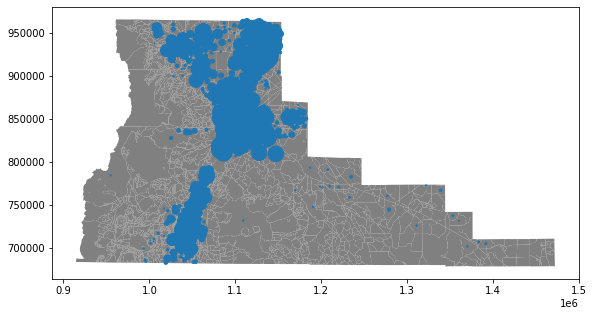

In [112]:
# calculate census block centroids
block_centroids = deschutes_blocks.centroid

# base of plot = census blocks in deschites county
base = deschutes_blocks.plot(color="Grey", figsize=(15,5))

# plot centroids on top of census blocks, with width determined by population
block_centroids.plot(ax=base, markersize=(deschutes_blocks['P001001'].astype(int)))